In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
# Example: Convert bytes to uint16

def readBytes( bytes):
    byte_data = bytes  # Little-endian representation of 513 (0x0201)
    (frames,fps,brightness,color1,color2,color3) = struct.unpack('<HHHBBB', byte_data)  # '<H' = little-endian unsigned short
    print(frames,fps,brightness,color1,color2,color3)
    return   (frames,fps,brightness,color1,color2,color3)


Server started at 0.0.0.0:12345
Waiting for a client to connect...
Client connected from ('192.168.0.100', 7681)
8 30 3 120 120 120


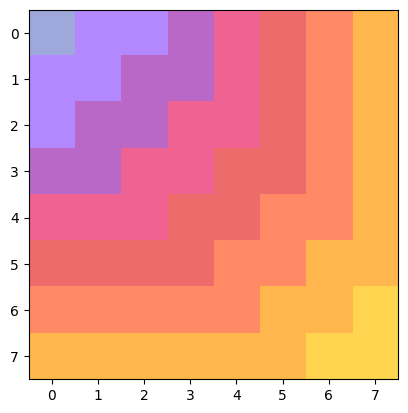

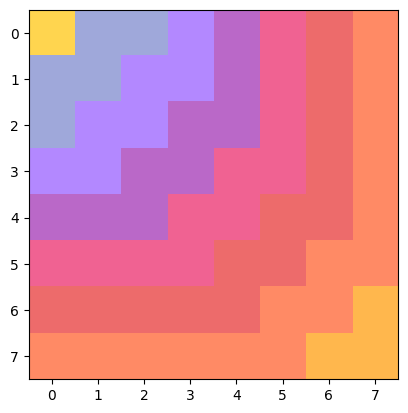

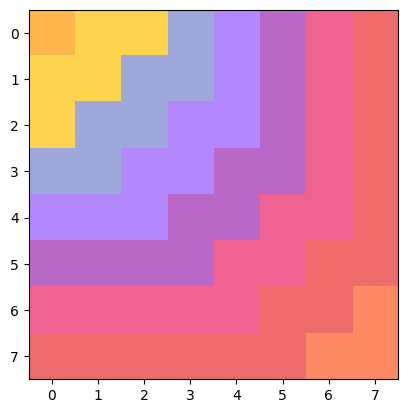

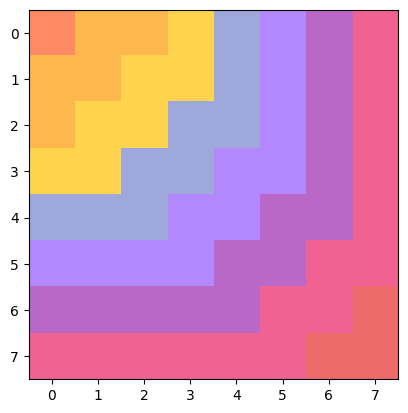

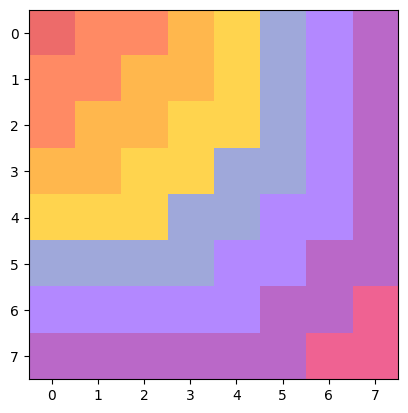

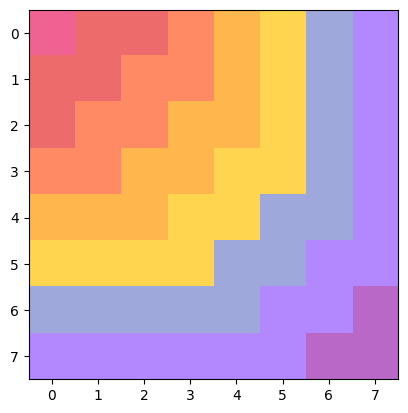

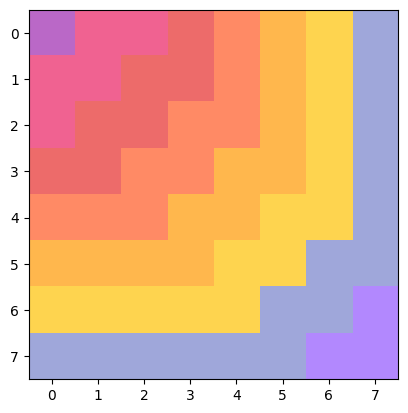

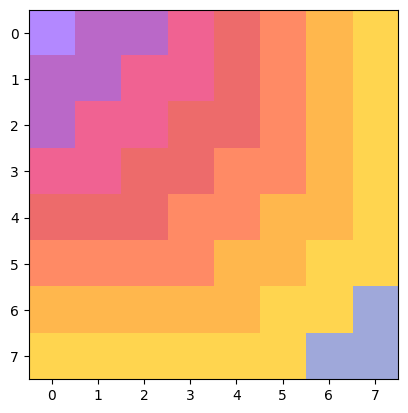

An error occurred: unpack requires a buffer of 9 bytes


In [2]:
import socket

def server_read_from_socket(host: str, port: int):
    # Create a socket object
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as server_socket:
        try:
            # Bind the socket to the specified host and port
            server_socket.bind((host, port))
            print(f"Server started at {host}:{port}")
            
            # Listen for incoming connections
            server_socket.listen(1)  # Allow 1 queued connection
            print("Waiting for a client to connect...")

            # Accept a connection
            client_socket, client_address = server_socket.accept()
            print(f"Client connected from {client_address}")

            # Read data from the client
            with client_socket:
                while True:
                    data = client_socket.recv(9)  # Read up to 1024 bytes
                    (frames,fps,brightness,color1,color2,color3) = readBytes(data)
                    
                    data = client_socket.recv(frames * 192)
                    
                    img = np.frombuffer(data,dtype=np.uint8).reshape((frames , 8,8,3))
                    # print(img)
                    for i in range(frames):
                        plt.imshow(img[i])
                        plt.show()
                    client_socket.sendall((b"thanks paaisi"))
                    
                    
                    

        except Exception as e:
            print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    server_host = "0.0.0.0"  # Replace with your server's IP
    server_port = 12345        # Replace with your server's port
    server_read_from_socket(server_host, server_port)
